#**Face Mask Detection Dataset**

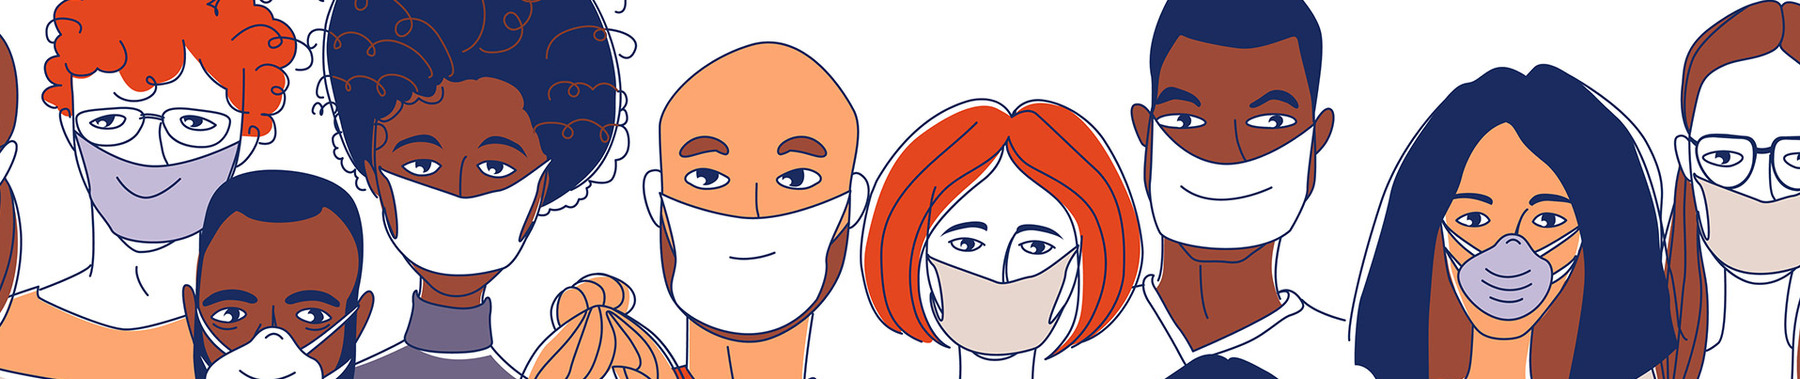

Face Mask Detection Dataset 7553 Images

## **About Dataset**

### **Face Mask Detection Data set**

In recent trend in world wide Lockdowns due to COVID19 outbreak, as Face Mask is became mandatory for everyone while roaming outside, approach of Deep Learning for Detecting Faces With and Without mask were a good trendy practice. Here I have created a model that detects face mask trained on 7553 images with 3 color channels (RGB).
On Custom CNN architecture Model training accuracy reached 94% and Validation accuracy 96%.

###**Content**

Data set consists of 7553 RGB images in 2 folders as with_mask and without_mask. Images are named as label with_mask and without_mask. Images of faces with mask are 3725 and images of faces without mask are 3828.

###**Acknowledgements**

I have taken 1776 images including both With and Without Face Mask images from Prajna Bhandary's Github account
https://github.com/prajnasb/observations

Remaining 5777 images are collected and filtered from Google search engine.

**3725 Images of Face with Mask**

**3828 Images of Face without Mask.**

###**Inspiration**

Inspired by Adrian Rosebrock, PhD. With the help of his guidance on his website https://www.pyimagesearch.com/ it was easy to understand the basics of Image processing and Deep Learning.

##**Extracting Dataset using Kaggle API**

In [1]:
# Install the Kaggle Library
!pip install Kaggle

In [2]:
# Configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


##**Install necessary Libraries**

In [3]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
to

##**Import the Libraries**

###**Importing the Datasets from Kaggle**

In [4]:
# API to fetch the dataset from Kaggle
!kaggle datasets download omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 89% 146M/163M [00:01<00:00, 142MB/s]
100% 163M/163M [00:01<00:00, 126MB/s]


In [5]:
# Extracting the compressed dataset
from zipfile import ZipFile
file_name = "/content/face-mask-dataset.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [6]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


##**Import the Libraries**

In [81]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import cv2
from google.colab.patches import cv2_imshow
import gradio as gr

In [8]:
with_mask_files = os.listdir("/content/data/with_mask")
print("First five names of: ",with_mask_files[0:5])
print("Last five names of: ",with_mask_files[-5:])

First five names of:  ['with_mask_123.jpg', 'with_mask_3665.jpg', 'with_mask_1542.jpg', 'with_mask_2495.jpg', 'with_mask_622.jpg']
Last five names of:  ['with_mask_591.jpg', 'with_mask_26.jpg', 'with_mask_2145.jpg', 'with_mask_276.jpg', 'with_mask_2253.jpg']


In [9]:
without_mask_files = os.listdir("/content/data/without_mask")
print("First five names of: ",without_mask_files[0:5])
print("Last five names of: ",without_mask_files[-5:])

First five names of:  ['without_mask_3597.jpg', 'without_mask_1020.jpg', 'without_mask_1106.jpg', 'without_mask_2641.jpg', 'without_mask_2010.jpg']
Last five names of:  ['without_mask_1354.jpg', 'without_mask_2790.jpg', 'without_mask_1302.jpg', 'without_mask_2005.jpg', 'without_mask_1165.jpg']


In [10]:
print("Number of with mask images:", len(with_mask_files))
print("Number of without mask images:", len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


* **with mask ---> 1**
* **without mask ---> 0**

In [11]:
# create the labels

with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


## **Displaying the Images**

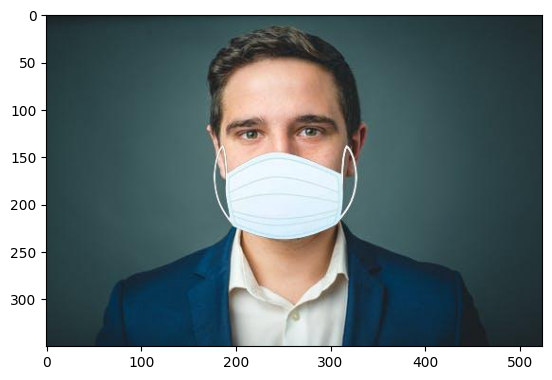

In [14]:
# Displaying with mask image
img = mpimg.imread("/content/data/with_mask/with_mask_883.jpg")
imgplot = plt.imshow(img)
plt.show()

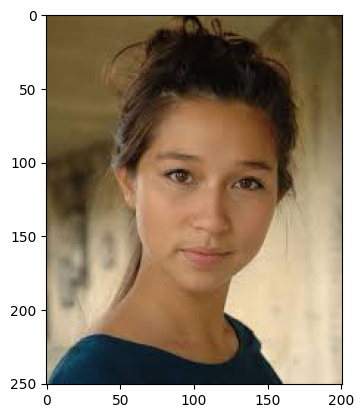

In [15]:
# Displaying without mask image
img = mpimg.imread("/content/data/without_mask/without_mask_3027.jpg")
imgplot = plt.imshow(img)
plt.show()

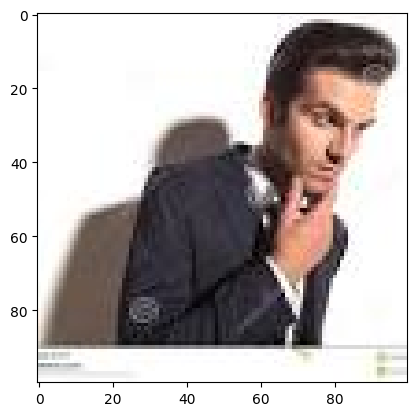

In [16]:
# Displaying without mask image
img = mpimg.imread("/content/data/without_mask/without_mask_1063.jpg")
imgplot = plt.imshow(img)
plt.show()

## **Image Preprocessing**

* **Resize the Images**
* **Convert the images to numpy array**

In [17]:
# Convert the images to numpy array

with_mask_path = "/content/data/with_mask/"

data = []

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image  = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

without_mask_path = "/content/data/without_mask/"

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image  = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
print("Total images with and without Mask: ", len(data))

Total images with and without Mask:  7553


In [19]:
type(data)

list

In [20]:
type(labels)

list

array([[[133, 148, 155],
        [131, 146, 153],
        [132, 147, 154],
        ...,
        [214, 205, 210],
        [214, 205, 210],
        [214, 205, 210]],

       [[134, 149, 156],
        [133, 147, 154],
        [133, 146, 154],
        ...,
        [212, 203, 208],
        [212, 203, 208],
        [213, 204, 209]],

       [[135, 148, 155],
        [133, 146, 153],
        [133, 146, 153],
        ...,
        [207, 198, 203],
        [209, 200, 205],
        [212, 203, 208]],

       ...,

       [[255, 251, 253],
        [255, 252, 254],
        [253, 253, 255],
        ...,
        [ 40,  32,  30],
        [ 33,  23,  22],
        [ 43,  33,  32]],

       [[255, 254, 255],
        [255, 255, 254],
        [254, 254, 255],
        ...,
        [ 40,  30,  29],
        [ 32,  22,  21],
        [ 36,  26,  25]],

       [[255, 255, 255],
        [254, 255, 254],
        [253, 255, 254],
        ...,
        [ 40,  30,  29],
        [ 39,  29,  28],
        [ 41,  31,  30]]], dtype=uint8)
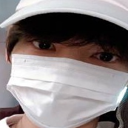

In [21]:
data[0]

In [22]:
type(data[0])

numpy.ndarray

In [23]:
data[0].shape

(128, 128, 3)

In [24]:
# Converting the image list and label list to numpy arrays
X = np.array(data)
y = np.array(labels)

In [25]:
type(X)

numpy.ndarray

In [26]:
type(y)

numpy.ndarray

In [27]:
print(X.shape)
print(y.shape)

(7553, 128, 128, 3)
(7553,)


In [28]:
print(y)

[1 1 1 ... 0 0 0]


##**Splitting the Dataset into Training and Test Sets**

In [29]:
# Splitting the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=500)
print("\nDataset split completed:")
print(f"Total samples: {X.shape[0]}, Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Dataset split completed:
Total samples: 7553, Training samples: 5664, Test samples: 1889


In [30]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(7553, 128, 128, 3)
(5664, 128, 128, 3)
(1889, 128, 128, 3)


* **5664 --> Training Images**
* **1889 --> Test Images**

In [31]:
# Normalization (Scaling the values to be in range of 0 - 1)
X_train_norm = X_train / 255.0

X_test_norm = X_test / 255.0

In [32]:
print(X_train_norm)

[[[[0.84705882 0.85882353 0.89411765]
   [0.84705882 0.85882353 0.89411765]
   [0.84705882 0.85882353 0.89411765]
   ...
   [0.85490196 0.85490196 0.89411765]
   [0.85490196 0.85490196 0.89411765]
   [0.85490196 0.85490196 0.89411765]]

  [[0.84705882 0.85882353 0.89411765]
   [0.84705882 0.85882353 0.89411765]
   [0.84705882 0.85882353 0.89411765]
   ...
   [0.85490196 0.85490196 0.89411765]
   [0.85490196 0.85490196 0.89411765]
   [0.85490196 0.85490196 0.89411765]]

  [[0.84705882 0.85882353 0.89411765]
   [0.84705882 0.85882353 0.89411765]
   [0.84705882 0.85882353 0.89411765]
   ...
   [0.85490196 0.85490196 0.89411765]
   [0.85490196 0.85490196 0.89411765]
   [0.85490196 0.85490196 0.89411765]]

  ...

  [[0.80392157 0.81568627 0.85098039]
   [0.80392157 0.81568627 0.85098039]
   [0.80784314 0.81960784 0.85490196]
   ...
   [0.79215686 0.80392157 0.83921569]
   [0.79215686 0.80392157 0.83921569]
   [0.79215686 0.80392157 0.83921569]]

  [[0.8        0.81176471 0.84705882]
   [0.8

## **Building the Convolutional Neural Networks (CNN)**

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(128, kernel_size=(3,3),
                              activation='relu',
                              input_shape=(128,128,3)))

model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation="sigmoid"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Compile the neural network
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["Accuracy"])

In [35]:
# Training the neural network
history = model.fit(X_train_norm, y_train, validation_split=0.2,
                    epochs=15, validation_data=(X_test_norm, y_test))

Epoch 1/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step - Accuracy: 0.6993 - loss: 2.7947 - val_Accuracy: 0.8920 - val_loss: 0.2649
Epoch 2/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - Accuracy: 0.8887 - loss: 0.2829 - val_Accuracy: 0.9042 - val_loss: 0.2306
Epoch 3/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - Accuracy: 0.9163 - loss: 0.2264 - val_Accuracy: 0.9111 - val_loss: 0.2344
Epoch 4/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - Accuracy: 0.9275 - loss: 0.1956 - val_Accuracy: 0.9079 - val_loss: 0.2530
Epoch 5/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - Accuracy: 0.9311 - loss: 0.1714 - val_Accuracy: 0.9301 - val_loss: 0.2137
Epoch 6/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - Accuracy: 0.9604 - loss: 0.1091 - val_Accuracy: 0.9206 - val_loss: 0.3131
Epoch 7/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - Accuracy: 0.9560 - loss: 0.1207 - val_Accuracy: 0.9285 - val_loss: 0.2410
Epoch 8/15
177/177 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - Accuracy: 0.9672 - loss: 0.0929 - 

## **Model Evaluation**

<function matplotlib.pyplot.show(close=None, block=None)>

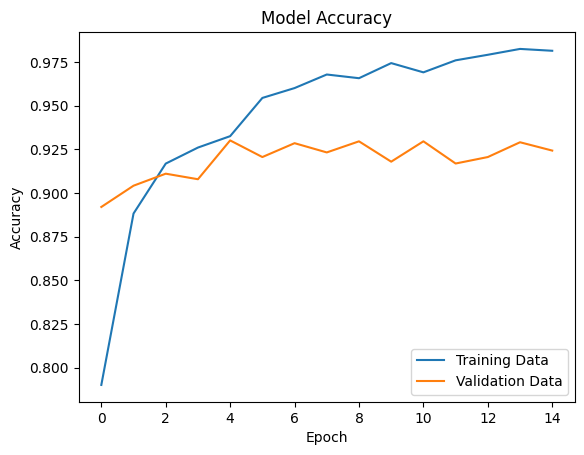

In [40]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='lower right')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

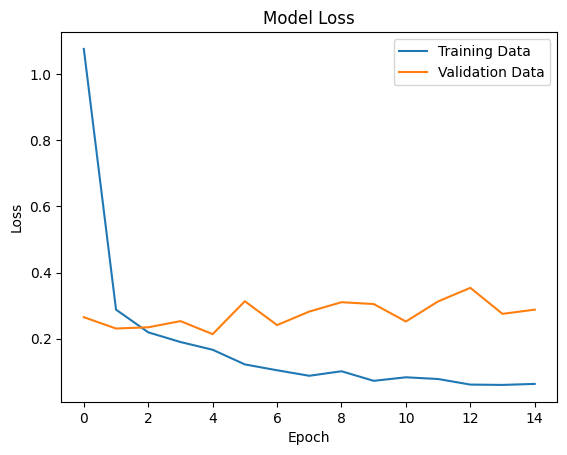

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Data', 'Validation Data'], loc='upper right')
plt.show

In [46]:
loss, Accuracy = model.evaluate(X_test_norm, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {Accuracy:.4f}')


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - Accuracy: 0.9350 - loss: 0.2535
Test Loss: 0.2877
Test Accuracy: 0.9243


In [82]:
# Save the trained model
model = model.save("trained_model.h5")   # Ensure the model is correctly saved and accessible

##**Predictive System**

In [83]:
# Load the trained model
model = load_model("trained_model.h5")  # Ensure your model is correctly saved and accessible

Enter the path of the image to be detected: /content/test_wear_mask2.jfif


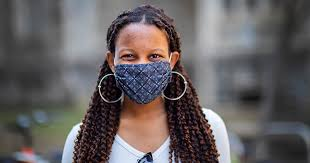

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
[[0.2678107  0.95586914]]
The person in the image is wearing a mask


In [84]:
# Prompt the user to enter the path of the image they want to detect
input_img_path = input("Enter the path of the image to be detected: ")

# Read the image from the specified path using OpenCV
input_img = cv2.imread(input_img_path)

# Display the image (for Google Colab users, use cv2_imshow; for local execution, use cv2.imshow)
cv2_imshow(input_img)

# Resize the image to 128x128 pixels to match the input size expected by the model
input_img_resized = cv2.resize(input_img, (128,128))

# Normalize the pixel values to be in the range [0,1] by dividing by 255
input_img_scaled = input_img_resized / 255.0

# Reshape the image to match the model's expected input shape: (1, 128, 128, 3)
# - 1 represents the batch size (single image)
# - 128x128 is the image dimension
# - 3 is the number of color channels (RGB)
input_img_reshaped = np.reshape(input_img_scaled, [1,128,128,3])

# Make a prediction using the trained model
input_pred = model.predict(input_img_reshaped)

# Print the raw prediction output (probability scores for each class)
print(input_pred)

# Extract the class index with the highest probability
input_pred_label = np.argmax(input_pred)  # Returns either 0 or 1

# Interpret the prediction result based on the class index
if input_pred_label == 1:
    print("The person in the image is wearing a mask")  # Class 1 represents "mask"
else:
    print("The person in the image is not wearing a mask")  # Class 0 represents "no mask"


Enter the path of the image to be detected: /content/test_not_wear_mask.jfif


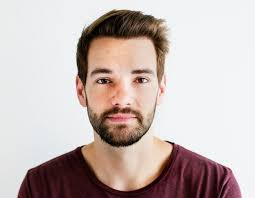

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.54270804 0.5296466 ]]
The person in the image is not wearing a mask


In [85]:
# Prompt the user to enter the path of the image they want to detect
input_img_path = input("Enter the path of the image to be detected: ")

# Read the image from the specified path using OpenCV
input_img = cv2.imread(input_img_path)

# Display the image (for Google Colab users, use cv2_imshow; for local execution, use cv2.imshow)
cv2_imshow(input_img)

# Resize the image to 128x128 pixels to match the input size expected by the model
input_img_resized = cv2.resize(input_img, (128,128))

# Normalize the pixel values to be in the range [0,1] by dividing by 255
input_img_scaled = input_img_resized / 255.0

# Reshape the image to match the model's expected input shape: (1, 128, 128, 3)
# - 1 represents the batch size (single image)
# - 128x128 is the image dimension
# - 3 is the number of color channels (RGB)
input_img_reshaped = np.reshape(input_img_scaled, [1,128,128,3])

# Make a prediction using the trained model
input_pred = model.predict(input_img_reshaped)

# Print the raw prediction output (probability scores for each class)
print(input_pred)

# Extract the class index with the highest probability
input_pred_label = np.argmax(input_pred)  # Returns either 0 or 1

# Interpret the prediction result based on the class index
if input_pred_label == 1:
    print("The person in the image is wearing a mask")  # Class 1 represents "mask"
else:
    print("The person in the image is not wearing a mask")  # Class 0 represents "no mask"


In [86]:
# Define the function for mask detection
def predict_mask(image):
    """
    Predict if the uploaded image belongs to the 'Mask' or 'No Mask' category.
    """

    # Convert image to OpenCV format (BGR)
    input_img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Resize the image to match model input size (128x128 pixels)
    input_img_resized = cv2.resize(input_img, (128, 128))

    # Normalize pixel values to be in the range [0,1]
    input_img_scaled = input_img_resized / 255.0

    # Reshape the image to fit the model's expected input format
    input_img_reshaped = np.reshape(input_img_scaled, [1, 128, 128, 3])

    # Predict the class
    input_prediction = model.predict(input_img_reshaped)

    # Extract the class with the highest probability
    input_pred_label = np.argmax(input_prediction)

    # Define class labels
    class_labels = {0: "The person in the image is NOT wearing a mask 😷❌",
                    1: "The person in the image is WEARING a mask ✅😷"}

    return class_labels[input_pred_label]

# Create a Gradio Interface
interface = gr.Interface(
    fn=predict_mask,  # Function to be executed
    inputs=gr.Image(type="numpy"),  # Accepts an image input
    outputs="text",  # Outputs the classification result
    title="Face Mask Detector 😷",
    description="Upload an image to check if the person is wearing a mask or not."
)

# Launch the Gradio App
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8a7c625da58b49779b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [87]:
# Define the function for mask detection
def predict_mask(image):
    """
    Predict if the uploaded image belongs to the 'Mask' or 'No Mask' category.
    """

    # Convert image to OpenCV format (BGR)
    input_img = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Resize the image to match model input size (128x128 pixels)
    input_img_resized = cv2.resize(input_img, (128, 128))

    # Normalize pixel values to be in the range [0,1]
    input_img_scaled = input_img_resized / 255.0

    # Reshape the image to fit the model's expected input format
    input_img_reshaped = np.reshape(input_img_scaled, [1, 128, 128, 3])

    # Predict the class
    input_prediction = model.predict(input_img_reshaped)

    # Extract the class with the highest probability
    input_pred_label = np.argmax(input_prediction)

    # Define class labels
    class_labels = {0: "The person in the image is NOT wearing a mask 😷❌",
                    1: "The person in the image is WEARING a mask ✅😷"}

    return class_labels[input_pred_label]

# Create a Gradio Interface
interface = gr.Interface(
    fn=predict_mask,  # Function to be executed
    inputs=gr.Image(type="numpy"),  # Accepts an image input
    outputs="text",  # Outputs the classification result
    title="Face Mask Detector 😷",
    description="Upload an image to check if the person is wearing a mask or not."
)

# Launch the Gradio App
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cca29e8503454a965e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
